Student Name: Martin Power

Student ID: 9939245

### Purpose

The purpose of this E-tivity is to help you become confident in using Numpy’s functionality for matrix manipulation and to learn about a very useful data processing technique: principal components analysis, or PCA. You will find that using Numpy is much easier for matrix manipulation than what you have done to date!

### Task (Complete by Saturday Week 5)

Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
Store those results from your fit method that are required to transform the data set, in suitable class properties.
Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.
 

N.B.:

Limit your code to the aspects explicitly listed. 
Use the Jupyter Notebook provided in the repository for week 5. This notebook contains the data that needs to be transformed.
The required modules have already been imported for you. You should not import any other modules.
If you find creating a class with this functionality daunting, please start by creating normal functions in your notebook. If time permits, you can then change to use of a class later. 
 

HINTS:

Numpy.mean() will 'flatten' your tensor by default. To obtain the mean along a given axis, you may use the axis parameter.

Numpy.cov() assumes by default that data is presented with one observation per column. This can be changed using the rowvar parameter. 

A Numpy.matrix is a convenient way of performing the matrix operations required for PCA whilst retaining a matrix/vector like structure. Use of this class is discouraged, but would form a good starting point for tackling this week's challenge. Once you have the code working with the matrix class, changing to arrays is relatively straight forward.

You can use Scikitlearn as follows to check the Eigen vectors that you have found with your 'fit' mehod:

pca = PCA(n_components=2)
pca.fit(data)
print(pca.components_)

You can use Scikitlearn to obtain 
GIT push your implementation and post your manual calculations to E-tivity 5: Linear Algebra in Numpy and Beyond and provide the name of your branch.

### Respond (Complete by Wednesday Week 6)

Respond to a post of one of your peers with a respectful and in-depth assessment of the implementation with a view to pointing out potential improvements or sound alternative solutions.

### Reflect (Complete by Saturday Week 6)

With your code (containing any corrections you have made based on your peers’ feedback), do the following:

For the case where n_components = 1, compare the resulting dataset of your transform method with the resulting dataset from Scikitlearn’s transform method by plotting the points on an XY plot. If there are any differences, explain these in a comment directly under the cell with your plot.
For the case where n_components = 1, compare the dataset resulting from your transform method with the original dataset by plotting the points on an XY plot. Comment on the differences between original and transformed data in the cell directly below your plot. In your comment, explain why and how PCA can be used for dimensionality reduction
 


- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [19]:
 # Reset to clear any stale variables
%reset -f

In [20]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [21]:
a_x = 0.05
a_y= 10

In [22]:
use_matrix = 0 # 0: Use array for data, 1: Use matrix for data

if(use_matrix==1):
    data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
else:
    data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [23]:
data.shape

(20, 2)

In [24]:
print(type(data))

<class 'numpy.ndarray'>


In [25]:
# You can use Scikitlearn as follows to check the Eigen vectors 
# that you have found with your 'fit' method:

pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)



My Eigenvalues
 [5.81970324e+02 3.80290091e-01]
SciKit Eigenvalues
 [5.81970324e+02 3.80290091e-01]

My Eigenvectors
 [[-0.24399863 -0.96977558]
 [-0.96977558  0.24399863]]
SciKit Eigenvectors
 [[ 0.24399863  0.96977558]
 [ 0.96977558 -0.24399863]]


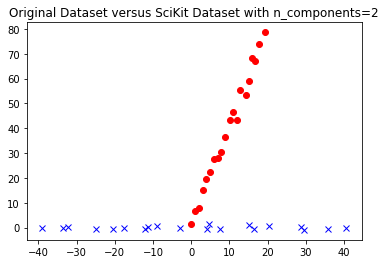

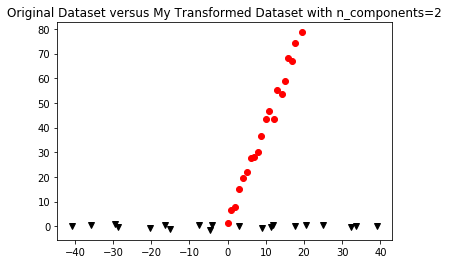

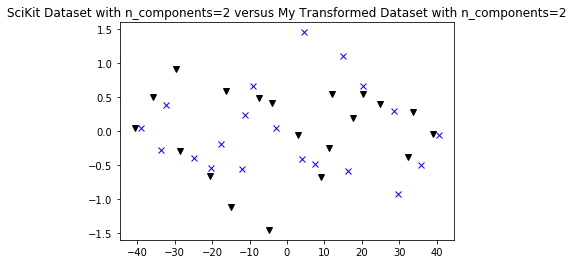

In [26]:
class MyPCA(object):
    
    
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit(self, X):
        # Determine number of components. "None" case borrowed from SciKit
        if(self.n_components==None):
            self.n_components = min(X.shape)
              
        # Calculate the mean of each column in D
        self.M = np.mean(X, axis=0)
        
        # Centre the columns by subtracting the means
        self.C = X - self.M
        
        # Calculate Covariance matrix of Centered matrix
        V = np.cov(self.C, rowvar=False)
        raw_values, raw_vectors = eig(V)
          
        # Sort Eigenvales to determine which Eigenvector is the PCA
        #sorted_indices = np.argsort(values)
        # Credit to Cormac Lavery - replace basic sort with sort of squared values
        sorted_indices = np.argsort(np.square(raw_values))
        sorted_values  = raw_values[sorted_indices[::-1]]
        
        # NOTE: Use .T as eig() returns vectors in columns
        sorted_vectors  = raw_vectors.T[sorted_indices[::-1]]
        
        # Adjust Eigenvalues and Eigenvectors based on n_components
        self.values  = sorted_values[:self.n_components]
        self.vectors = sorted_vectors[:self.n_components,:]
    
        
    def transform(self, X):
        X_new = np.dot(self.C, self.vectors.T) # MPP why not vectors X C
        #X_new = np.dot(self.vectors, self.C.T).T # MPP why not vectors X C
        return X_new
    
    def inverse_transform(self, X):
        X_inv = np.dot(X, self.vectors) + self.M
        return X_inv
    

# Perform PCA on data using this class
my_pca = MyPCA()
my_pca.fit(data)
data_my_pca = my_pca.transform(data)
data_reduced_my_pca = my_pca.inverse_transform(data_my_pca)

# Compare Eigenvalues and Eigenvectors from both methods
print("\nMy Eigenvalues\n",my_pca.values)
print("SciKit Eigenvalues\n",pca.explained_variance_)


print("\nMy Eigenvectors\n",my_pca.vectors)
print("SciKit Eigenvectors\n",pca.components_)

plt.title('Original Dataset versus SciKit Dataset with n_components=2')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_pca[:,0], data_pca[:,1],'xb')
plt.show()

plt.title('Original Dataset versus My Transformed Dataset with n_components=2')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_my_pca[:,0], data_my_pca[:,1],'kv')
plt.show()

plt.title('SciKit Dataset with n_components=2 versus My Transformed Dataset with n_components=2')
plt.plot(data_pca[:,0], data_pca[:,1],'xb')
plt.plot(data_my_pca[:,0], data_my_pca[:,1],'kv')
plt.show()


### Comparison of Eigen Vectors and Eigen Values using SciKit and my own Class

The Eigenvalues match from both methods.
The polarity of the Eigenvectors with the maximum Eigenvalue differ but this does not matter as they point describe the same line even if they point if different directions along that line.

NOTE: Above comment holds true some of the time but not all of the time. Sometimes depending on the random data, the Eigenvectors and Eigenvalues from both methods match exactly


Eigen Vectors obtained using Scikitlearn with n_components set to 2
[[ 0.24399863  0.96977558]
 [ 0.96977558 -0.24399863]]

Eigen Values obtained using Scikitlearn with n_components set to 2
[5.81970324e+02 3.80290091e-01]

Eigen Vectors obtained using Scikitlearn with n_components set to 1
[[0.24399863 0.96977558]]

Eigen Values obtained using Scikitlearn with n_components set to 1
[581.97032405]


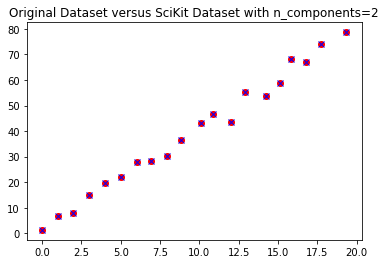

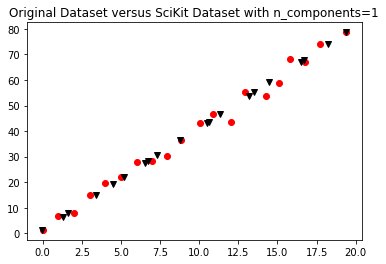

In [27]:
# Re-running SciKit with n_components set to 1
pca1 = PCA(n_components=1)
pca1.fit(data)
data_pca1 = pca1.transform(data)
data_reduced1 = pca1.inverse_transform(data_pca1)


print("\nEigen Vectors obtained using Scikitlearn with n_components set to 2")
print(pca.components_)
print("\nEigen Values obtained using Scikitlearn with n_components set to 2")
print(pca.explained_variance_)

print("\nEigen Vectors obtained using Scikitlearn with n_components set to 1")
print(pca1.components_)
print("\nEigen Values obtained using Scikitlearn with n_components set to 1")
print(pca1.explained_variance_)

plt.title('Original Dataset versus SciKit Dataset with n_components=2')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()

plt.title('Original Dataset versus SciKit Dataset with n_components=1')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced1[:,0], data_reduced1[:,1],'kv')
plt.show()

### Differences Between Using n_components=2 and n_components=1 with SciKit

In the first plot, the original data and the data from SciKit almost align exactly - there has been no reduction in the data

In the second plot, with n_components=1 there has been a reduction in the data. The Y values look almost identical for the various data points but the X values have been shifted left or right of the original X value


Eigen Vectors obtained using MyPCA with n_components set to 2
[[-0.24399863 -0.96977558]
 [-0.96977558  0.24399863]]

Eigen Values obtained using MyPCA with n_components set to 2
[5.81970324e+02 3.80290091e-01]

Eigen Vectors obtained using MyPCA with n_components set to 1
[[-0.24399863 -0.96977558]]

Eigen Values obtained using MyPCA with n_components set to 1
[581.97032405]


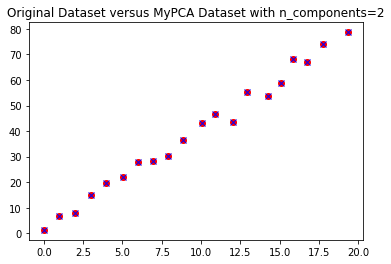

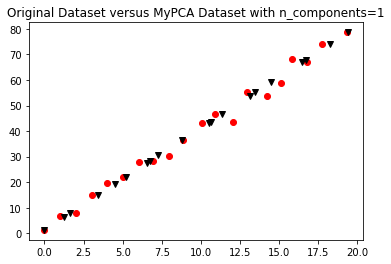

In [28]:
# Re-running MyPCA with n_components set to 1
my_pca1 = MyPCA(n_components=1)
my_pca1.fit(data)
data_my_pca1 = my_pca1.transform(data)
data_reduced_my_pca1 = my_pca1.inverse_transform(data_my_pca1)

print("\nEigen Vectors obtained using MyPCA with n_components set to 2")
print(my_pca.vectors)
print("\nEigen Values obtained using MyPCA with n_components set to 2")
print(my_pca.values)

print("\nEigen Vectors obtained using MyPCA with n_components set to 1")
print(my_pca1.vectors)
print("\nEigen Values obtained using MyPCA with n_components set to 1")
print(my_pca1.values)

plt.title('Original Dataset versus MyPCA Dataset with n_components=2')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced_my_pca[:,0], data_reduced_my_pca[:,1],'xb')
plt.show()

plt.title('Original Dataset versus MyPCA Dataset with n_components=1')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced_my_pca1[:,0], data_reduced_my_pca1[:,1],'kv')
plt.show()

### Differences Between Using n_components=2 and n_components=1 with MyPCA

In the first plot, the original data and the data from MyPCA almost align exactly - there has been no reduction in the data

In the second plot, with n_components=1 there has been a reduction in the data. The Y values look almost identical for the various data points but the X values have been shifted left or right of the original X value

This is the same as the result with using SciKIT

NOTE: The interesting point here is that the direction of the eigenvectors obtained from both methods was opposite but ultimately the data obtained was the same. This is to be expected but it is still good to see operating in practice

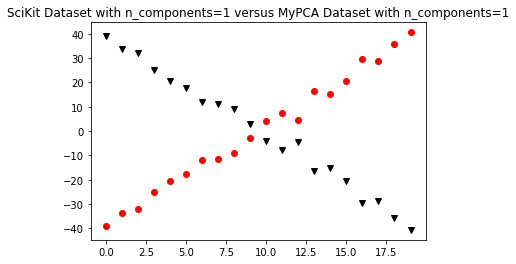

In [29]:
plt.title('SciKit Dataset with n_components=1 versus MyPCA Dataset with n_components=1')
plt.plot(data_pca1[:,0], 'or')
plt.plot(data_my_pca1[:,0], 'kv')
plt.show()


### Reflect Part 1 - Differences Between Dataset from Transform Method using SciKit and using MyPCA with using n_components=1

The plots are mirrored about the X-axis. SciKIT used positive values for the Eigenvector but MyPCA method used negative values
for the Eigenvector which causes this difference - even though the Eigenvectors in both cases point in the same direction


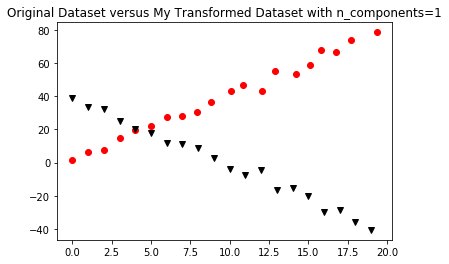

In [30]:
plt.title('Original Dataset versus My Transformed Dataset with n_components=1')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_my_pca1[:,0],'kv')
plt.show()



### Reflect Part 1 - Differences Between Original Dataset and Dataset using MyPCA with using n_components=1

This plot is a bit unusual in that it is plotting a 2D dataset against a 1D dataset in 2D space.

The dataset obtained from the transform method using MyPCA with n_components=1 almost mirrors the original dataset with the axis of
mirroring being at the intersection point between the two lines.